### 1. Prepare data for ingestion into the neural network.

In [15]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [16]:
apple_stock_df = pd.read_csv("./apple_stock_prepared.csv")
apple_stock_df.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [17]:
X = apple_stock_df[apple_stock_df.columns[0:-1]]
Y = apple_stock_df[apple_stock_df.columns[-1]]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
import random
random.seed(100)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 100)

In [21]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5, random_state = 100)

In [25]:
def num_steps(length: int, batch_size: int):
    '''
    returns no of step per each epoch 
    '''
    return length//batch_size + 1

In [26]:
batch_size = 10
num_steps(len(X_train), batch_size)

16

### 2.  Define the neural network layers and model.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [115]:
def stock_predictor_model(x_train):
 
    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation='relu',
                kernel_initializer='he_normal'))
    # Final dense layer
    stock_predictor.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mape'])
    return stock_predictor

In [123]:
model = stock_predictor_model(X_train)

### 3.  Visualize keras model by using Pydot

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [118]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

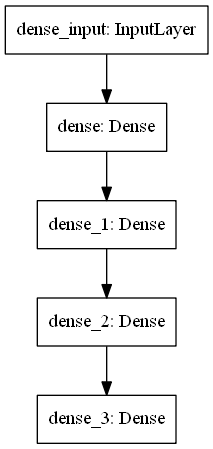

In [119]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

### 4. Train the model using basic parameters.

In [120]:
batch_size = 20
num_steps(len(X_train), batch_size)

8

In [125]:
history = model.fit(X_train, Y_train, 
                    validation_data=[X_val, Y_val],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Train on 156 samples, validate on 20 samples
Epoch 1/1000
156/156 [==============================] - ETA: 0s - loss: 3083.7148 - mean_absolute_percentage_error: 99.92 - 0s 1ms/sample - loss: 4833.1490 - mean_absolute_percentage_error: 99.6966 - val_loss: 24473.3848 - val_mean_absolute_percentage_error: 99.5689
Epoch 2/1000
156/156 [==============================] - ETA: 0s - loss: 4661.1001 - mean_absolute_percentage_error: 99.65 - 0s 77us/sample - loss: 4831.8665 - mean_absolute_percentage_error: 99.4106 - val_loss: 24471.2305 - val_mean_absolute_percentage_error: 99.3727
Epoch 3/1000
156/156 [==============================] - ETA: 0s - loss: 5558.8613 - mean_absolute_percentage_error: 99.06 - 0s 96us/sample - loss: 4830.2036 - mean_absolute_percentage_error: 99.1952 - val_loss: 24468.8691 - val_mean_absolute_percentage_error: 99.1444
Epoch 4/1000
156/156 [==============================] - ETA: 0s - loss: 5851.1748 - mean_absolute_percentage_error: 99.07 - 0s 109us/sample - loss: 4828

156/156 [==============================] - ETA: 0s - loss: 2695.1406 - mean_absolute_percentage_error: 72.75 - 0s 102us/sample - loss: 2857.2609 - mean_absolute_percentage_error: 87.2023 - val_loss: 20268.5195 - val_mean_absolute_percentage_error: 92.0078
Epoch 62/1000
156/156 [==============================] - ETA: 0s - loss: 2534.5720 - mean_absolute_percentage_error: 76.04 - 0s 109us/sample - loss: 2776.4052 - mean_absolute_percentage_error: 88.6767 - val_loss: 20084.7266 - val_mean_absolute_percentage_error: 92.7743
Epoch 63/1000
156/156 [==============================] - ETA: 0s - loss: 2454.0261 - mean_absolute_percentage_error: 75.76 - 0s 102us/sample - loss: 2693.3130 - mean_absolute_percentage_error: 90.4187 - val_loss: 19901.9883 - val_mean_absolute_percentage_error: 93.4077
Epoch 64/1000
156/156 [==============================] - ETA: 0s - loss: 771.0893 - mean_absolute_percentage_error: 112.52 - 0s 83us/sample - loss: 2610.0267 - mean_absolute_percentage_error: 91.8071 - va

Epoch 122/1000
156/156 [==============================] - ETA: 0s - loss: 175.1543 - mean_absolute_percentage_error: 77.770 - 0s 115us/sample - loss: 285.1291 - mean_absolute_percentage_error: 68.5783 - val_loss: 13105.5137 - val_mean_absolute_percentage_error: 75.4331
Epoch 123/1000
156/156 [==============================] - ETA: 0s - loss: 212.2153 - mean_absolute_percentage_error: 78.015 - 0s 102us/sample - loss: 280.9422 - mean_absolute_percentage_error: 68.4731 - val_loss: 13072.8838 - val_mean_absolute_percentage_error: 75.2279
Epoch 124/1000
156/156 [==============================] - ETA: 0s - loss: 825.4880 - mean_absolute_percentage_error: 72.303 - 0s 90us/sample - loss: 278.1538 - mean_absolute_percentage_error: 68.0287 - val_loss: 13030.8359 - val_mean_absolute_percentage_error: 75.0000
Epoch 125/1000
156/156 [==============================] - ETA: 0s - loss: 461.6777 - mean_absolute_percentage_error: 60.189 - 0s 96us/sample - loss: 272.8943 - mean_absolute_percentage_error:

Epoch 183/1000
156/156 [==============================] - ETA: 0s - loss: 112.6666 - mean_absolute_percentage_error: 52.943 - 0s 96us/sample - loss: 120.6591 - mean_absolute_percentage_error: 62.7897 - val_loss: 12256.4951 - val_mean_absolute_percentage_error: 60.0437
Epoch 184/1000
156/156 [==============================] - ETA: 0s - loss: 102.6956 - mean_absolute_percentage_error: 57.251 - 0s 83us/sample - loss: 119.5811 - mean_absolute_percentage_error: 62.5115 - val_loss: 12225.8340 - val_mean_absolute_percentage_error: 59.7363
Epoch 185/1000
156/156 [==============================] - ETA: 0s - loss: 119.0253 - mean_absolute_percentage_error: 58.231 - 0s 83us/sample - loss: 117.9357 - mean_absolute_percentage_error: 62.8109 - val_loss: 12229.4434 - val_mean_absolute_percentage_error: 59.3341
Epoch 186/1000
156/156 [==============================] - ETA: 0s - loss: 84.3849 - mean_absolute_percentage_error: 67.09 - 0s 102us/sample - loss: 115.2145 - mean_absolute_percentage_error: 62

Epoch 214/1000
156/156 [==============================] - ETA: 0s - loss: 77.8730 - mean_absolute_percentage_error: 58.16 - 0s 83us/sample - loss: 75.2543 - mean_absolute_percentage_error: 54.8820 - val_loss: 11920.2783 - val_mean_absolute_percentage_error: 49.5888
Epoch 215/1000
156/156 [==============================] - ETA: 0s - loss: 96.2003 - mean_absolute_percentage_error: 64.62 - 0s 102us/sample - loss: 73.8491 - mean_absolute_percentage_error: 54.7377 - val_loss: 11895.4961 - val_mean_absolute_percentage_error: 49.3225
Epoch 216/1000
156/156 [==============================] - ETA: 0s - loss: 100.9849 - mean_absolute_percentage_error: 49.039 - 0s 89us/sample - loss: 72.8990 - mean_absolute_percentage_error: 54.5019 - val_loss: 11912.1426 - val_mean_absolute_percentage_error: 49.4071
Epoch 217/1000
156/156 [==============================] - ETA: 0s - loss: 100.4508 - mean_absolute_percentage_error: 71.478 - 0s 102us/sample - loss: 71.7329 - mean_absolute_percentage_error: 54.2868

Epoch 245/1000
156/156 [==============================] - ETA: 0s - loss: 67.8862 - mean_absolute_percentage_error: 59.36 - 0s 89us/sample - loss: 47.9386 - mean_absolute_percentage_error: 46.0105 - val_loss: 11749.8809 - val_mean_absolute_percentage_error: 46.8798
Epoch 246/1000
156/156 [==============================] - ETA: 0s - loss: 38.3406 - mean_absolute_percentage_error: 49.57 - 0s 96us/sample - loss: 47.3521 - mean_absolute_percentage_error: 45.9727 - val_loss: 11804.3027 - val_mean_absolute_percentage_error: 46.7234
Epoch 247/1000
156/156 [==============================] - ETA: 0s - loss: 36.2769 - mean_absolute_percentage_error: 56.34 - 0s 96us/sample - loss: 46.0160 - mean_absolute_percentage_error: 45.2547 - val_loss: 11766.7168 - val_mean_absolute_percentage_error: 46.5324
Epoch 248/1000
156/156 [==============================] - ETA: 0s - loss: 23.9205 - mean_absolute_percentage_error: 35.74 - 0s 96us/sample - loss: 45.6638 - mean_absolute_percentage_error: 44.9005 - val

Epoch 276/1000
156/156 [==============================] - ETA: 0s - loss: 50.5252 - mean_absolute_percentage_error: 29.54 - 0s 89us/sample - loss: 29.6758 - mean_absolute_percentage_error: 35.3615 - val_loss: 11719.3027 - val_mean_absolute_percentage_error: 38.8847
Epoch 277/1000
156/156 [==============================] - ETA: 0s - loss: 20.3491 - mean_absolute_percentage_error: 44.69 - 0s 90us/sample - loss: 29.3862 - mean_absolute_percentage_error: 35.1399 - val_loss: 11737.7588 - val_mean_absolute_percentage_error: 38.9063
Epoch 278/1000
156/156 [==============================] - ETA: 0s - loss: 13.7659 - mean_absolute_percentage_error: 55.75 - 0s 96us/sample - loss: 28.5707 - mean_absolute_percentage_error: 35.0913 - val_loss: 11685.5322 - val_mean_absolute_percentage_error: 38.1583
Epoch 279/1000
156/156 [==============================] - ETA: 0s - loss: 46.3188 - mean_absolute_percentage_error: 40.15 - 0s 96us/sample - loss: 28.3001 - mean_absolute_percentage_error: 34.9210 - val

Epoch 307/1000
156/156 [==============================] - ETA: 0s - loss: 15.2462 - mean_absolute_percentage_error: 31.83 - 0s 109us/sample - loss: 17.2735 - mean_absolute_percentage_error: 27.0735 - val_loss: 11730.7334 - val_mean_absolute_percentage_error: 30.1697
Epoch 308/1000
156/156 [==============================] - ETA: 0s - loss: 26.0344 - mean_absolute_percentage_error: 35.83 - 0s 102us/sample - loss: 17.4903 - mean_absolute_percentage_error: 27.1756 - val_loss: 11770.2305 - val_mean_absolute_percentage_error: 29.5414
Epoch 309/1000
156/156 [==============================] - ETA: 0s - loss: 12.3065 - mean_absolute_percentage_error: 18.36 - 0s 109us/sample - loss: 16.9014 - mean_absolute_percentage_error: 26.8670 - val_loss: 11799.0381 - val_mean_absolute_percentage_error: 30.0308
Epoch 310/1000
156/156 [==============================] - ETA: 0s - loss: 33.4179 - mean_absolute_percentage_error: 22.43 - 0s 102us/sample - loss: 16.5020 - mean_absolute_percentage_error: 26.7898 -

Epoch 338/1000
156/156 [==============================] - ETA: 0s - loss: 12.7000 - mean_absolute_percentage_error: 22.92 - 0s 102us/sample - loss: 9.9109 - mean_absolute_percentage_error: 21.2513 - val_loss: 11928.8584 - val_mean_absolute_percentage_error: 23.6435
Epoch 339/1000
156/156 [==============================] - ETA: 0s - loss: 8.5380 - mean_absolute_percentage_error: 25.048 - 0s 109us/sample - loss: 9.8659 - mean_absolute_percentage_error: 21.0388 - val_loss: 11995.9531 - val_mean_absolute_percentage_error: 22.9957
Epoch 340/1000
156/156 [==============================] - ETA: 0s - loss: 7.0605 - mean_absolute_percentage_error: 15.741 - 0s 102us/sample - loss: 9.8171 - mean_absolute_percentage_error: 21.0384 - val_loss: 11937.6582 - val_mean_absolute_percentage_error: 23.6923
Epoch 341/1000
156/156 [==============================] - ETA: 0s - loss: 7.4725 - mean_absolute_percentage_error: 16.388 - 0s 115us/sample - loss: 9.5440 - mean_absolute_percentage_error: 20.9144 - val

Epoch 369/1000
156/156 [==============================] - ETA: 0s - loss: 3.0430 - mean_absolute_percentage_error: 15.376 - 0s 102us/sample - loss: 6.3073 - mean_absolute_percentage_error: 16.8589 - val_loss: 12171.7012 - val_mean_absolute_percentage_error: 20.1562
Epoch 370/1000
156/156 [==============================] - ETA: 0s - loss: 3.1528 - mean_absolute_percentage_error: 10.172 - 0s 102us/sample - loss: 6.1641 - mean_absolute_percentage_error: 17.0675 - val_loss: 12212.9404 - val_mean_absolute_percentage_error: 20.2317
Epoch 371/1000
156/156 [==============================] - ETA: 0s - loss: 4.8505 - mean_absolute_percentage_error: 23.146 - 0s 96us/sample - loss: 6.0410 - mean_absolute_percentage_error: 16.8678 - val_loss: 12288.9434 - val_mean_absolute_percentage_error: 19.8999
Epoch 372/1000
156/156 [==============================] - ETA: 0s - loss: 5.9498 - mean_absolute_percentage_error: 21.426 - 0s 96us/sample - loss: 6.0563 - mean_absolute_percentage_error: 16.9404 - val_l

Epoch 400/1000
156/156 [==============================] - ETA: 0s - loss: 2.2768 - mean_absolute_percentage_error: 21.580 - 0s 90us/sample - loss: 4.1304 - mean_absolute_percentage_error: 14.3723 - val_loss: 12655.3975 - val_mean_absolute_percentage_error: 17.7165
Epoch 401/1000
156/156 [==============================] - ETA: 0s - loss: 3.5154 - mean_absolute_percentage_error: 15.151 - 0s 90us/sample - loss: 4.1560 - mean_absolute_percentage_error: 14.1036 - val_loss: 12648.5605 - val_mean_absolute_percentage_error: 18.2578
Epoch 402/1000
156/156 [==============================] - ETA: 0s - loss: 4.0623 - mean_absolute_percentage_error: 10.896 - 0s 96us/sample - loss: 4.2274 - mean_absolute_percentage_error: 14.1142 - val_loss: 12621.4893 - val_mean_absolute_percentage_error: 17.4256
Epoch 403/1000
156/156 [==============================] - ETA: 0s - loss: 3.9271 - mean_absolute_percentage_error: 14.321 - 0s 96us/sample - loss: 3.9372 - mean_absolute_percentage_error: 13.9915 - val_los

Epoch 431/1000
156/156 [==============================] - ETA: 0s - loss: 1.5606 - mean_absolute_percentage_error: 8.78 - 0s 109us/sample - loss: 2.9875 - mean_absolute_percentage_error: 11.1953 - val_loss: 12887.4697 - val_mean_absolute_percentage_error: 17.0506
Epoch 432/1000
156/156 [==============================] - ETA: 0s - loss: 3.9534 - mean_absolute_percentage_error: 13.074 - 0s 102us/sample - loss: 2.9736 - mean_absolute_percentage_error: 11.1745 - val_loss: 13007.7793 - val_mean_absolute_percentage_error: 16.5625
Epoch 433/1000
156/156 [==============================] - ETA: 0s - loss: 2.3321 - mean_absolute_percentage_error: 17.023 - 0s 83us/sample - loss: 3.0326 - mean_absolute_percentage_error: 11.0391 - val_loss: 13053.7988 - val_mean_absolute_percentage_error: 16.5084
Epoch 434/1000
156/156 [==============================] - ETA: 0s - loss: 2.5934 - mean_absolute_percentage_error: 15.217 - 0s 90us/sample - loss: 3.2001 - mean_absolute_percentage_error: 10.8241 - val_los

156/156 [==============================] - ETA: 0s - loss: 1.9293 - mean_absolute_percentage_error: 10.473 - 0s 115us/sample - loss: 2.0858 - mean_absolute_percentage_error: 8.6128 - val_loss: 13176.0674 - val_mean_absolute_percentage_error: 15.9049
Epoch 494/1000
156/156 [==============================] - ETA: 0s - loss: 1.8628 - mean_absolute_percentage_error: 8.01 - 0s 96us/sample - loss: 2.1653 - mean_absolute_percentage_error: 8.6039 - val_loss: 13192.5498 - val_mean_absolute_percentage_error: 15.8683
Epoch 495/1000
156/156 [==============================] - ETA: 0s - loss: 2.1943 - mean_absolute_percentage_error: 6.10 - 0s 102us/sample - loss: 2.0117 - mean_absolute_percentage_error: 8.5882 - val_loss: 13128.8574 - val_mean_absolute_percentage_error: 16.2943
Epoch 496/1000
156/156 [==============================] - ETA: 0s - loss: 1.7795 - mean_absolute_percentage_error: 9.74 - 0s 96us/sample - loss: 2.1984 - mean_absolute_percentage_error: 8.6088 - val_loss: 13147.7578 - val_mea

156/156 [==============================] - ETA: 0s - loss: 2.7535 - mean_absolute_percentage_error: 8.50 - 0s 96us/sample - loss: 1.6266 - mean_absolute_percentage_error: 7.5789 - val_loss: 13054.7744 - val_mean_absolute_percentage_error: 15.1814
Epoch 556/1000
156/156 [==============================] - ETA: 0s - loss: 1.6467 - mean_absolute_percentage_error: 8.40 - 0s 89us/sample - loss: 1.5951 - mean_absolute_percentage_error: 7.4913 - val_loss: 13089.4180 - val_mean_absolute_percentage_error: 15.2711
Epoch 557/1000
156/156 [==============================] - ETA: 0s - loss: 0.6754 - mean_absolute_percentage_error: 5.49 - 0s 96us/sample - loss: 1.6919 - mean_absolute_percentage_error: 7.6885 - val_loss: 13097.6328 - val_mean_absolute_percentage_error: 15.1208
Epoch 558/1000
156/156 [==============================] - ETA: 0s - loss: 1.3807 - mean_absolute_percentage_error: 6.49 - 0s 96us/sample - loss: 1.6382 - mean_absolute_percentage_error: 7.5994 - val_loss: 13107.9248 - val_mean_ab

156/156 [==============================] - ETA: 0s - loss: 0.9832 - mean_absolute_percentage_error: 6.81 - 0s 96us/sample - loss: 1.3668 - mean_absolute_percentage_error: 7.0630 - val_loss: 13043.0850 - val_mean_absolute_percentage_error: 14.3259
Epoch 618/1000
156/156 [==============================] - ETA: 0s - loss: 0.8899 - mean_absolute_percentage_error: 9.83 - 0s 102us/sample - loss: 1.4059 - mean_absolute_percentage_error: 6.8856 - val_loss: 13029.1748 - val_mean_absolute_percentage_error: 14.8589
Epoch 619/1000
156/156 [==============================] - ETA: 0s - loss: 1.1945 - mean_absolute_percentage_error: 5.44 - 0s 96us/sample - loss: 1.2921 - mean_absolute_percentage_error: 6.8996 - val_loss: 12992.3779 - val_mean_absolute_percentage_error: 14.6915
Epoch 620/1000
156/156 [==============================] - ETA: 0s - loss: 0.6854 - mean_absolute_percentage_error: 9.83 - 0s 102us/sample - loss: 1.4922 - mean_absolute_percentage_error: 6.8012 - val_loss: 12975.0967 - val_mean_

156/156 [==============================] - ETA: 0s - loss: 0.9330 - mean_absolute_percentage_error: 5.71 - 0s 102us/sample - loss: 1.1788 - mean_absolute_percentage_error: 6.6816 - val_loss: 12959.5205 - val_mean_absolute_percentage_error: 14.1935
Epoch 680/1000
156/156 [==============================] - ETA: 0s - loss: 1.8215 - mean_absolute_percentage_error: 5.81 - 0s 96us/sample - loss: 1.2055 - mean_absolute_percentage_error: 6.5516 - val_loss: 13047.8301 - val_mean_absolute_percentage_error: 13.4709
Epoch 681/1000
156/156 [==============================] - ETA: 0s - loss: 0.8485 - mean_absolute_percentage_error: 4.29 - 0s 83us/sample - loss: 1.1232 - mean_absolute_percentage_error: 6.2426 - val_loss: 12887.9072 - val_mean_absolute_percentage_error: 14.6081
Epoch 682/1000
156/156 [==============================] - ETA: 0s - loss: 0.6209 - mean_absolute_percentage_error: 6.17 - 0s 90us/sample - loss: 1.1430 - mean_absolute_percentage_error: 6.4609 - val_loss: 12940.3623 - val_mean_a

156/156 [==============================] - ETA: 0s - loss: 1.0400 - mean_absolute_percentage_error: 6.02 - 0s 102us/sample - loss: 1.0692 - mean_absolute_percentage_error: 6.2154 - val_loss: 13070.4844 - val_mean_absolute_percentage_error: 13.3624
Epoch 742/1000
156/156 [==============================] - ETA: 0s - loss: 0.9523 - mean_absolute_percentage_error: 10.359 - 0s 96us/sample - loss: 0.9728 - mean_absolute_percentage_error: 6.0828 - val_loss: 13100.2021 - val_mean_absolute_percentage_error: 13.3041
Epoch 743/1000
156/156 [==============================] - ETA: 0s - loss: 1.9806 - mean_absolute_percentage_error: 5.97 - 0s 96us/sample - loss: 1.0330 - mean_absolute_percentage_error: 6.0914 - val_loss: 13095.6035 - val_mean_absolute_percentage_error: 13.4925
Epoch 744/1000
156/156 [==============================] - ETA: 0s - loss: 0.9209 - mean_absolute_percentage_error: 5.09 - 0s 102us/sample - loss: 1.0873 - mean_absolute_percentage_error: 6.2329 - val_loss: 12977.7012 - val_mea

156/156 [==============================] - ETA: 0s - loss: 1.8179 - mean_absolute_percentage_error: 7.15 - 0s 89us/sample - loss: 0.9585 - mean_absolute_percentage_error: 5.8320 - val_loss: 13010.7236 - val_mean_absolute_percentage_error: 13.7088
Epoch 804/1000
156/156 [==============================] - ETA: 0s - loss: 0.2049 - mean_absolute_percentage_error: 6.20 - 0s 83us/sample - loss: 0.9558 - mean_absolute_percentage_error: 5.7051 - val_loss: 13074.0127 - val_mean_absolute_percentage_error: 13.0571
Epoch 805/1000
156/156 [==============================] - ETA: 0s - loss: 1.0310 - mean_absolute_percentage_error: 3.68 - 0s 89us/sample - loss: 1.0145 - mean_absolute_percentage_error: 5.7881 - val_loss: 12977.4463 - val_mean_absolute_percentage_error: 13.4346
Epoch 806/1000
156/156 [==============================] - ETA: 0s - loss: 0.8096 - mean_absolute_percentage_error: 3.61 - 0s 96us/sample - loss: 0.9682 - mean_absolute_percentage_error: 5.6992 - val_loss: 13040.4863 - val_mean_ab

156/156 [==============================] - ETA: 0s - loss: 0.4682 - mean_absolute_percentage_error: 6.50 - 0s 96us/sample - loss: 0.9829 - mean_absolute_percentage_error: 5.7798 - val_loss: 13182.0996 - val_mean_absolute_percentage_error: 12.5732
Epoch 866/1000
156/156 [==============================] - ETA: 0s - loss: 1.1192 - mean_absolute_percentage_error: 5.27 - 0s 109us/sample - loss: 0.8807 - mean_absolute_percentage_error: 5.3937 - val_loss: 13075.1846 - val_mean_absolute_percentage_error: 13.2288
Epoch 867/1000
156/156 [==============================] - ETA: 0s - loss: 0.7523 - mean_absolute_percentage_error: 6.44 - 0s 77us/sample - loss: 0.8608 - mean_absolute_percentage_error: 5.5753 - val_loss: 13072.7529 - val_mean_absolute_percentage_error: 12.9794
Epoch 868/1000
156/156 [==============================] - ETA: 0s - loss: 0.3908 - mean_absolute_percentage_error: 7.19 - 0s 96us/sample - loss: 0.8682 - mean_absolute_percentage_error: 5.4810 - val_loss: 13157.2480 - val_mean_a

156/156 [==============================] - ETA: 0s - loss: 0.8345 - mean_absolute_percentage_error: 4.95 - 0s 96us/sample - loss: 0.7995 - mean_absolute_percentage_error: 5.1813 - val_loss: 13132.8105 - val_mean_absolute_percentage_error: 12.3470
Epoch 928/1000
156/156 [==============================] - ETA: 0s - loss: 0.4679 - mean_absolute_percentage_error: 4.47 - 0s 102us/sample - loss: 0.8926 - mean_absolute_percentage_error: 5.2501 - val_loss: 13091.8496 - val_mean_absolute_percentage_error: 12.6859
Epoch 929/1000
156/156 [==============================] - ETA: 0s - loss: 0.5385 - mean_absolute_percentage_error: 3.51 - 0s 102us/sample - loss: 0.7601 - mean_absolute_percentage_error: 5.2396 - val_loss: 13081.2510 - val_mean_absolute_percentage_error: 12.8394
Epoch 930/1000
156/156 [==============================] - ETA: 0s - loss: 0.5713 - mean_absolute_percentage_error: 2.53 - 0s 96us/sample - loss: 0.8179 - mean_absolute_percentage_error: 5.1431 - val_loss: 13192.6045 - val_mean_

156/156 [==============================] - ETA: 0s - loss: 0.8822 - mean_absolute_percentage_error: 3.37 - 0s 83us/sample - loss: 0.7426 - mean_absolute_percentage_error: 5.0890 - val_loss: 13226.4268 - val_mean_absolute_percentage_error: 12.1806
Epoch 990/1000
156/156 [==============================] - ETA: 0s - loss: 0.6835 - mean_absolute_percentage_error: 3.71 - 0s 102us/sample - loss: 0.7665 - mean_absolute_percentage_error: 4.8641 - val_loss: 13245.6904 - val_mean_absolute_percentage_error: 11.8451
Epoch 991/1000
156/156 [==============================] - ETA: 0s - loss: 0.9115 - mean_absolute_percentage_error: 5.37 - 0s 96us/sample - loss: 0.8095 - mean_absolute_percentage_error: 4.9409 - val_loss: 13228.1328 - val_mean_absolute_percentage_error: 11.9373
Epoch 992/1000
156/156 [==============================] - ETA: 0s - loss: 0.4167 - mean_absolute_percentage_error: 4.53 - 0s 102us/sample - loss: 0.6673 - mean_absolute_percentage_error: 4.8559 - val_loss: 13114.3311 - val_mean_

### 5. Analyse the model performance using loss and accuracy curves

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

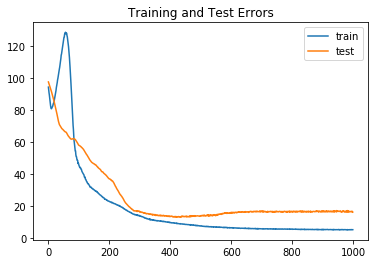

In [36]:
# plot training history
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

### 6. Hyperparameter tuning of neural network

install talos using **pip install talos**

In [37]:
import talos
from talos.model.hidden_layers import hidden_layers

In [49]:
p = {'lr': (0.1,0.5,10),
     'first_neuron':[10, 20],
     'hidden_layers':[1, 2, 3],
     'batch_size': (10,30,5),
     'epochs': [500],
     'dropout': (0, 0.5, 5),
     'shapes':['brick','funnel'],
      'activation': ['relu']
    }

**Funnel**
     
Funnel is the shape that roughly looks like an upside-dowm pyramind, so that the first layer is defined with max neurons, and the next layers are sligtly decreased compared to previous ones.

**Brick**

All the layers have first_neuron value. Called by shape='brick'.

In [39]:
def stock_prediction_model(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    
    model.add(Dropout(params['dropout']))
    
    # if we want to also test for number of layers and shapes, that's possible
    hidden_layers(model, params, 1)
   
    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    
    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(learning_rate=params['lr']),
                  metrics=['mape'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [51]:
# accessing the results data frame
t.data.head()

,round_epochs,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,lr,shapes
0,500,4834.015863,100.000000,24476.380371,100.000000,relu,10,0.4,500,20,3,0.42,brick
1,500,4834.015888,100.000000,24476.380859,100.000000,relu,22,0.0,500,20,2,0.14,brick
2,500,30.022124,21.125536,12442.597656,22.782560,relu,22,0.0,500,20,1,0.14,funnel
3,500,2498.114466,539.093079,19308.444055,281.779419,relu,14,0.0,500,20,3,0.38,funnel
4,500,4834.015910,100.000000,24476.380859,100.000000,relu,26,0.4,500,10,1,0.26,funnel


In [54]:
# access the summary details
t.details

experiment_name               stock_exp
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            02/15/20/08:58
x_shape                       (156, 16)
y_shape                          (156,)
dtype: object

In [56]:
# use Scan object as input
analyze_object = talos.Analyze(t)

In [58]:
# access the dataframe with the results
analyze_object.data.head()

,round_epochs,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,lr,shapes
0,500,4834.015863,100.000000,24476.380371,100.000000,relu,10,0.4,500,20,3,0.42,brick
1,500,4834.015888,100.000000,24476.380859,100.000000,relu,22,0.0,500,20,2,0.14,brick
2,500,30.022124,21.125536,12442.597656,22.782560,relu,22,0.0,500,20,1,0.14,funnel
3,500,2498.114466,539.093079,19308.444055,281.779419,relu,14,0.0,500,20,3,0.38,funnel
4,500,4834.015910,100.000000,24476.380859,100.000000,relu,26,0.4,500,10,1,0.26,funnel


In [59]:
# get the number of rounds in the Scan
analyze_object.rounds()

300

In [98]:
# get the highest result for any metric
analyze_object.low('val_mean_absolute_percentage_error')

17.504638671875

In [95]:
analyze_object.data[analyze_object.data.val_mean_absolute_percentage_error==17.504638671875]

,round_epochs,loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,lr,shapes,None
42,500,73.309825,33.518604,12395.920574,17.504639,relu,10,0.0,500,10,2,0.14,funnel,42


In [96]:
analyze_object.data.iloc[42,:]

round_epochs                              500
loss                                  73.3098
mean_absolute_percentage_error        33.5186
val_loss                              12395.9
val_mean_absolute_percentage_error    17.5046
activation                               relu
batch_size                                 10
dropout                                     0
epochs                                    500
first_neuron                               10
hidden_layers                               2
lr                                       0.14
shapes                                 funnel
NaN                                        42
Name: 42, dtype: object

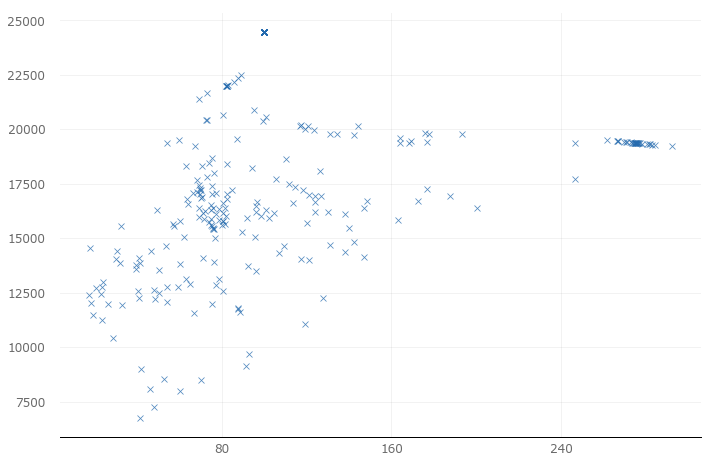

In [70]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_mean_absolute_percentage_error', 'val_loss')

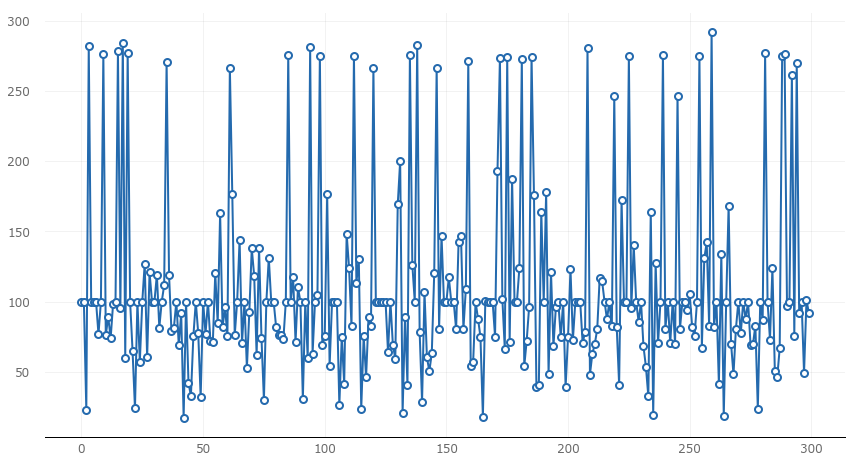

In [71]:
# line plot
analyze_object.plot_line('val_mean_absolute_percentage_error')

### 7. Generating predictions by using the trained model

In [99]:
best_model = t.best_model(metric='val_mean_absolute_percentage_error', asc=True)

In [100]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [108]:
import numpy as np
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [114]:
mean_absolute_percentage_error(Y_test, best_model.predict(X_test)[:,-1])

17.185139097920306